In [2]:
# Import the needed files
import sys
import os
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns   

In [3]:
# Navigate one directory up from the current working directory and then into the 'data' directory
path = os.path.join(os.getcwd(), '..', 'data', 'final_data.csv')

# Use the absolute path for clarity and reliability
absolute_path = os.path.abspath(path)

# Now 'absolute_path' can be used to access your file
data = pd.read_csv(absolute_path)

In [4]:
data.describe()

,Day_ahead_price,BEV_vehicles,Biomass (GWh),Hard Coal (GWh),Hydro (GWh),Lignite (GWh),Natural Gas (GWh),Nuclear (GWh),Oil price (EUR),Other (GWh),Pumped storage generation (GWh),Solar (GWh),Solar_radiation,Temperature,Wind offshore (GWh),Wind onshore (GWh),Wind_speed,net_total_export_import (GWh)
count,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000
mean,62.453914,396.593602,118.486935,214.253032,53.253624,333.633578,211.090962,186.423923,69.073816,62.341154,20.269726,117.377983,130.067689,9.780219,42.778408,225.877639,3.652084,94.524683
std,71.660402,587.287996,7.958115,129.475821,13.704976,92.685976,82.056365,77.628942,22.844781,11.929315,7.081098,82.187720,89.096577,7.022705,40.342480,183.697703,1.261233,105.497868
min,-56.870000,5.000000,97.089000,21.179000,6.804000,78.229000,66.163000,0.000000,14.840000,22.853000,4.285000,2.239000,7.120000,-13.690000,0.000000,7.121000,1.580000,-303.257000
25%,30.797100,25.000000,112.277000,103.463000,43.562500,282.637500,144.886500,155.738000,50.830000,54.112500,15.308000,42.376000,45.210000,4.270000,4.929000,89.492500,2.750000,28.964500
50%,39.823700,81.000000,119.739000,192.667000,52.437000,352.748000,201.712000,193.391000,66.210000,61.580000,19.424000,108.428000,118.330000,9.460000,31.537000,167.875000,3.370000,103.917000
75%,56.658950,724.000000,124.823000,307.503500,62.624000,398.257000,261.114500,243.535500,90.625000,70.463500,24.392000,177.726500,201.770000,15.575000,72.381500,306.367000,4.220000,170.670000
max,699.441700,3366.000000,139.229000,668.269000,98.191000,522.829000,630.588000,310.806000,116.080000,161.348000,54.512000,391.159000,357.540000,27.100000,154.954000,1019.391000,10.510000,351.498000


In [5]:
data

,date,Day_ahead_price,BEV_vehicles,Biomass (GWh),Hard Coal (GWh),Hydro (GWh),Lignite (GWh),Natural Gas (GWh),Nuclear (GWh),Oil price (EUR),Other (GWh),Pumped storage generation (GWh),Solar (GWh),Solar_radiation,Temperature,Wind offshore (GWh),Wind onshore (GWh),Wind_speed,net_total_export_import (GWh)
0,2012-01-01,18.1896,6,98.605,108.454,51.011,325.337,188.811,250.979,99.82,54.040,19.314,6.263,14.75,8.39,3.404,235.467,4.95,54.662
1,2012-01-02,33.8188,6,98.605,222.656,51.862,343.168,229.293,258.671,100.22,54.166,28.892,6.312,15.12,7.41,3.350,231.772,5.00,-64.477
2,2012-01-03,35.0263,6,98.605,162.204,48.851,336.773,241.297,271.495,100.62,53.518,21.072,24.226,31.88,5.23,7.292,504.484,7.77,-35.078
3,2012-01-04,32.1633,6,98.605,189.633,47.101,323.976,252.289,270.613,103.33,52.194,28.300,14.157,25.21,4.78,7.828,541.528,8.04,22.924
4,2012-01-05,20.3500,6,98.605,175.733,45.854,327.502,259.018,287.555,104.10,52.179,31.887,4.728,13.46,4.23,8.280,572.819,9.98,35.618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,2024-02-25,61.0938,947,123.683,48.501,58.671,193.697,255.124,0.000,75.36,60.627,13.565,169.216,97.58,4.52,29.879,278.787,3.43,-36.930
4435,2024-02-26,66.2683,947,124.810,69.146,58.444,281.177,289.764,0.000,75.22,59.810,12.231,110.504,73.25,4.96,62.336,239.555,3.12,-198.686
4436,2024-02-27,73.8362,947,124.989,103.379,59.181,351.355,354.042,0.000,76.24,67.170,23.753,85.584,58.12,4.53,16.951,131.761,3.11,-209.332
4437,2024-02-28,71.8213,947,125.068,93.416,58.160,350.348,338.216,0.000,76.71,65.375,19.042,106.330,66.00,3.69,68.585,76.355,2.46,-206.956


In [6]:
# Set date as index
data.set_index('date', inplace=True)

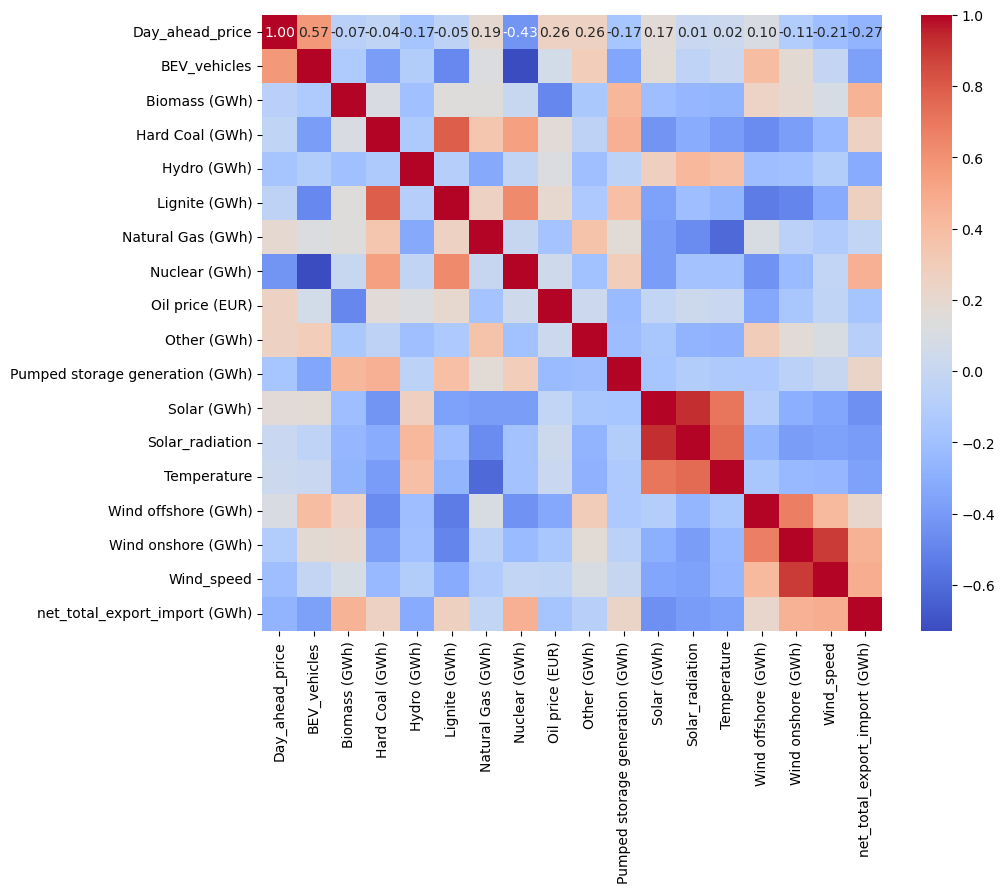

In [7]:
# Correlation matrix heatmap to understand the relationships
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


## Augmented Dickey-Fuller (ADF) test

In [8]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'Day_ahead_price' is the time series you want to test
result = adfuller(data['Day_ahead_price'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# Interpretation
if result[1] > 0.05:
    print("The time series is non-stationary.")
else:
    print("The time series is stationary.")


ADF Statistic: -3.6619251250521323
p-value: 0.004681727043597106
Critical Values:
	1%: -3.4318343720880873
	5%: -2.8621959125651086
	10%: -2.567119146381682
The time series is stationary.


## Decomposition


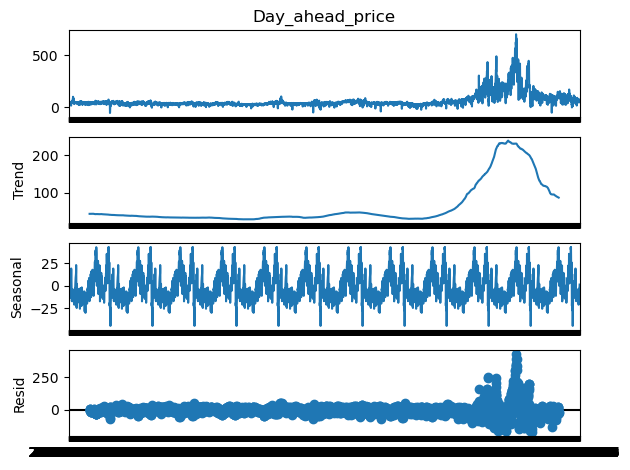

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data['Day_ahead_price'], model='additive', period=365)

# Plot the decomposed components
decomposition.plot()
plt.show()


## Autocorrelation analysis


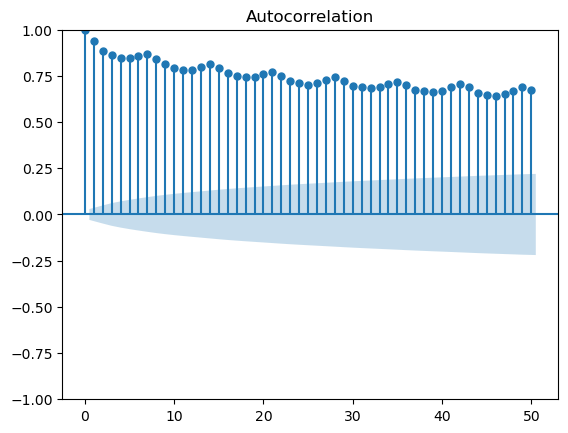

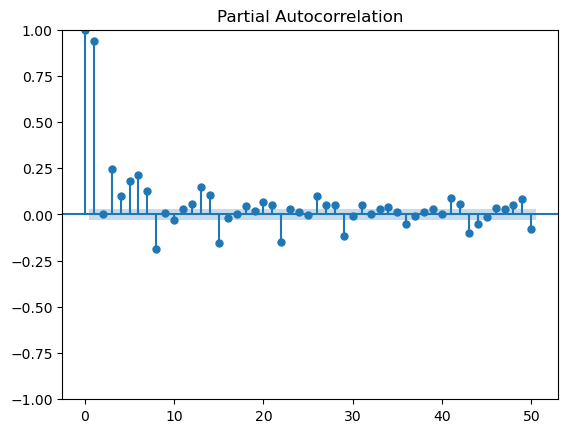

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation Function (ACF) plot
plot_acf(data['Day_ahead_price'], lags=50)
plt.show()

# Partial Autocorrelation Function (PACF) plot
plot_pacf(data['Day_ahead_price'], lags=50)
plt.show()


## Fourier transform

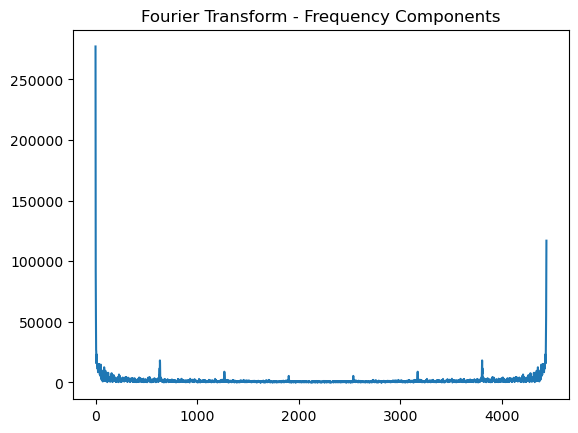

In [11]:
from numpy.fft import fft

# Compute the Fast Fourier Transform (FFT)
fft_results = fft(data['Day_ahead_price'])
frequencies = np.abs(fft_results)

plt.plot(frequencies)
plt.title('Fourier Transform - Frequency Components')
plt.show()


## Linear Regression

In [12]:
def train_test_split_sequential(X, y, test_size=0.2):
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    return X_train, X_test, y_train, y_test


In [13]:
import pandas as pd

# Let's create 3 lagged features for 'Day_ahead_price'
for lag in range(1, 4):
    data[f'Day_ahead_price_lag{lag}'] = data['Day_ahead_price'].shift(lag)

# Check the first few rows to see the lagged features
print(data.head())


            Day_ahead_price  BEV_vehicles  Biomass (GWh)  Hard Coal (GWh)  \
date                                                                        
2012-01-01          18.1896             6         98.605          108.454   
2012-01-02          33.8188             6         98.605          222.656   
2012-01-03          35.0263             6         98.605          162.204   
2012-01-04          32.1633             6         98.605          189.633   
2012-01-05          20.3500             6         98.605          175.733   

            Hydro (GWh)  Lignite (GWh)  Natural Gas (GWh)  Nuclear (GWh)  \
date                                                                       
2012-01-01       51.011        325.337            188.811        250.979   
2012-01-02       51.862        343.168            229.293        258.671   
2012-01-03       48.851        336.773            241.297        271.495   
2012-01-04       47.101        323.976            252.289        270.613   
2012

In [14]:
data.dropna(inplace=True)


In [15]:
# Assuming 'Day_ahead_price' is your target variable
X = data.drop(['Day_ahead_price'], axis=1)
y = data['Day_ahead_price']

# Proceed with train-test split, model training, and evaluation


Model Coefficients: [ 0.01350249 -0.03247228  0.02207702  0.00401841  0.03695746  0.02810756
  0.01768525  0.05849759  0.07433339  0.38621408  0.03777166 -0.02714
  0.30495049  0.0323788   0.00679296 -1.37165483 -0.04144893  0.4572855
 -0.01605654  0.193373  ]
Intercept: -25.711260323621225
Mean Squared Error (MSE): 3968.3252593392813
Coefficient of Determination (R^2): 0.6853258775400844


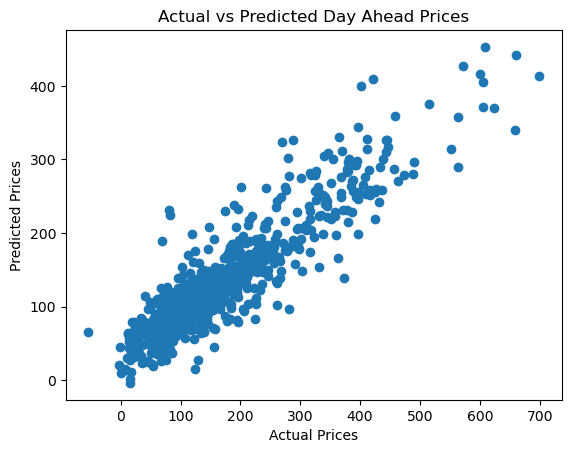

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have created lagged features and selected your predictors in X, and your target in y
X_train, X_test, y_train, y_test = train_test_split_sequential(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Coefficient of Determination (R^2):", r2_score(y_test, y_pred))

# Visualize the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Day Ahead Prices")
plt.show()

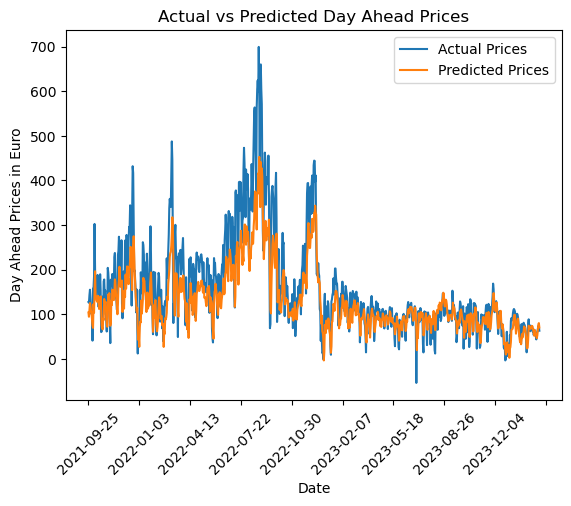

In [17]:
# Create a line plot of the predicted values and the original values over time, use index as date for x-axis, and 'Day_ahead_price' as y-axis
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices')
plt.xlabel('Date')
# Show only the months in the date column
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation=45)
plt.ylabel('Day Ahead Prices in Euro')
plt.title('Actual vs Predicted Day Ahead Prices')
plt.legend()


In [18]:
y_test.index

Index(['2021-09-25', '2021-09-26', '2021-09-27', '2021-09-28', '2021-09-29',
       '2021-09-30', '2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04',
       ...
       '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23', '2024-02-24',
       '2024-02-25', '2024-02-26', '2024-02-27', '2024-02-28', '2024-02-29'],
      dtype='object', name='date', length=888)

In [19]:
# Use the model to predict the next 30 days
X_future = X[-30:]
y_future = model.predict(X_future)
# Print the predicted prices for the next 30 days
print(y_future)


[68.25597427 69.87751188 60.54406102 48.06187931 28.19387851 23.34935725
 25.57170539 44.37026058 74.42708076 71.39435246 70.91753907 67.37646032
 71.36672156 73.01950535 68.30198393 73.89388002 68.93235418 64.55505393
 56.32956138 51.90138037 64.57632066 58.72937889 55.57095254 51.14168815
 46.45209377 52.9579958  63.66647466 76.37457138 80.27356392 70.39196447]


In [20]:
# %%
print("Current Working Directory:", os.getcwd())

# %%
# Assuming 'data' directory is at the same level as your notebook
data_path = '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/EEX_stock/storage/final_data_eex/'
file_name = 'eex_stock_prices_2006_2024.csv'
file_path = os.path.join(data_path, file_name)

# Function to import data
def import_data(file_path, index_col):
    data = pd.read_csv(file_path, sep=',')
    return data


# Import the data
stock_data = import_data(file_path, 0)

Current Working Directory: /Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/predictions


In [21]:
# Take only the values of March 2024 of the stock_data
stock_data = stock_data[stock_data['Date'].str.contains('2024-03')]
stock_data

# make date the index
stock_data.set_index('Date', inplace=True)

# convert array to dataframe
y_future_df = pd.DataFrame(y_future, columns=['Predicted Prices'])

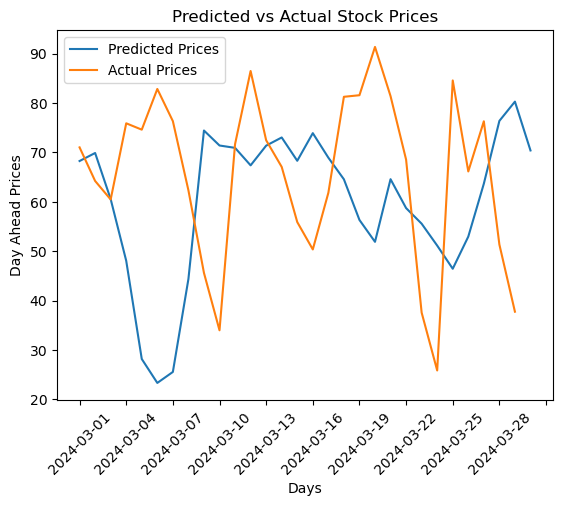

In [22]:
# compare stock_data prices with the predicted prices for the 30 days
plt.plot(y_future_df, label='Predicted Prices')
plt.plot(stock_data['Day Ahead Auktion (arithmetisch)'], label='Actual Prices')
plt.xlabel('Days')
plt.ylabel('Day Ahead Prices')
plt.title('Predicted vs Actual Stock Prices')
# Show only the months in the date column
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation=45)
plt.legend()
plt.show()
